In [0]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import io
from io import StringIO
from datetime import datetime

In [71]:
from google.colab import files
uploaded = files.upload()

Saving coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv to coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09 (1).csv


In [72]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

User uploaded file "coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv" with length 150309532 bytes


In [73]:
df = pd.read_csv(io.StringIO(uploaded['coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv'].decode('utf-8')))
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1417411980,300.0,300.0,300.0,300.0,0.01,3.0,300.0
1,1417412040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1417412100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1417412160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1417412220,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'],unit='s')
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2014-12-01 05:33:00,300.0,300.0,300.0,300.0,0.01,3.0,300.0
1,2014-12-01 05:34:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-12-01 05:35:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-12-01 05:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-12-01 05:37:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
df = df.set_index('Timestamp')
df.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2014-12-01 05:33:00,300.0,300.0,300.0,300.0,0.01,3.0,300.0
2014-12-01 05:34:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-01 05:35:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-01 05:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-01 05:37:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
# First thing is to fix the data for bars/candles where there are no trades. 
# Volume/trades are a single event so fill na's with zeroes for relevant fields...
df['Volume_(BTC)'].fillna(value=0, inplace=True)
df['Volume_(Currency)'].fillna(value=0, inplace=True)
df['Weighted_Price'].fillna(value=0, inplace=True)

# next we need to fix the OHLC (open high low close) data which is a continuous timeseries so
# lets fill forwards those values...
df['Open'].fillna(method='ffill', inplace=True)
df['High'].fillna(method='ffill', inplace=True)
df['Low'].fillna(method='ffill', inplace=True)
df['Close'].fillna(method='ffill', inplace=True)

df.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2014-12-01 05:33:00,300.0,300.0,300.0,300.0,0.01,3.0,300.0
2014-12-01 05:34:00,300.0,300.0,300.0,300.0,0.00,0.0,0.0
2014-12-01 05:35:00,300.0,300.0,300.0,300.0,0.00,0.0,0.0
2014-12-01 05:36:00,300.0,300.0,300.0,300.0,0.00,0.0,0.0
2014-12-01 05:37:00,300.0,300.0,300.0,300.0,0.00,0.0,0.0


In [77]:
df = df[(df != 0).all(1)]
df.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2014-12-01 05:33:00,300.0,300.0,300.0,300.0,0.010000,3.00000,300.0
2014-12-01 05:40:00,300.0,300.0,300.0,300.0,0.010000,3.00000,300.0
2014-12-01 06:24:00,370.0,370.0,370.0,370.0,0.010000,3.70000,370.0
2014-12-01 06:50:00,370.0,370.0,370.0,370.0,0.026556,9.82555,370.0
2014-12-02 05:29:00,377.0,377.0,377.0,377.0,0.010000,3.77000,377.0


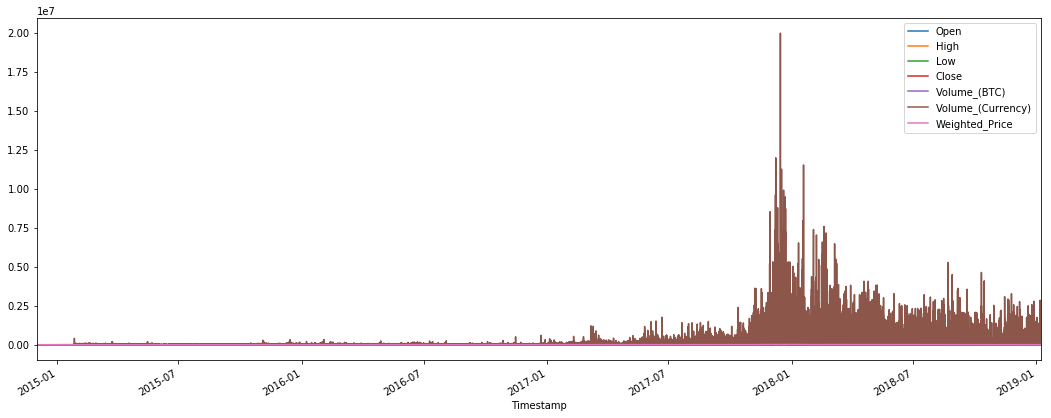

In [78]:
df.plot(figsize=(18,7))

In [79]:
# Select specific columns from the bigger data set
dfplot=pd.DataFrame(df, columns=['Open','Close'])
dfplot.head()

,Open,Close
Timestamp,,
2014-12-01 05:33:00,300.0,300.0
2014-12-01 05:40:00,300.0,300.0
2014-12-01 06:24:00,370.0,370.0
2014-12-01 06:50:00,370.0,370.0
2014-12-02 05:29:00,377.0,377.0


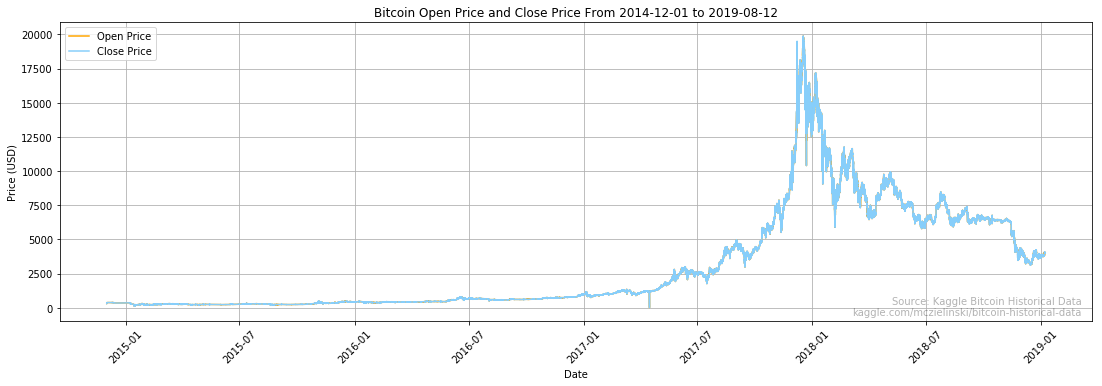

In [84]:
# create the plot space upon which to plot the data
fig, ax= plt.subplots()

# add grid lines
ax.grid()

# add the x-axis and the y-axis to the plot
ax.plot(dfplot['Open'], color = 'orange')
ax.plot(dfplot['Close'], color = 'lightskyblue')

# rotate tick labels
plt.setp(ax.get_xticklabels(), rotation=45)

# set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Price (USD)",
       title="Bitcoin Open Price and Close Price From 2014-12-01 to 2019-08-12");

# set legend
plt.legend(['Open Price', 'Close Price'], loc='upper left')

# add reference
ax.text(0.99, .02,
        "Source: Kaggle Bitcoin Historical Data\nkaggle.com/mczielinski/bitcoin-historical-data",
        transform=ax.transAxes,
        horizontalalignment="right",
        alpha=0.3)

# set plot size
fig.set_size_inches(18.5, 5.5)

Predict the future Weighted Price

In [54]:
price = np.array(df['Weighted_Price'], dtype=pd.Series)
price = pd.to_numeric(price,errors='coerce')
price

array([ 300.       ,  300.       ,  370.       , ..., 4006.0036347,
       4005.7199905, 4005.7456136])

In [59]:
training = weighted_price[weighted_price.index < '2018-01-09']
training.head()

,Weighted_Price
Timestamp,
2014-12-01 05:33:00,300.0
2014-12-01 05:40:00,300.0
2014-12-01 06:24:00,370.0
2014-12-01 06:50:00,370.0
2014-12-02 05:29:00,377.0


In [60]:
testing = weighted_price[weighted_price.index >= '2018-01-09']
testing.head()

,Weighted_Price
Timestamp,
2018-01-09 00:00:00,14975.389948
2018-01-09 00:01:00,14970.918297
2018-01-09 00:02:00,14970.236060
2018-01-09 00:03:00,14970.202985
2018-01-09 00:04:00,14939.489628


In [65]:
x_train = training.iloc[:, 0]
x_train = np.array(x_train, dtype=pd.Series)
x_train = pd.to_numeric(x_train,errors='coerce')
x_train

array([  300.      ,   300.      ,   370.      , ..., 14999.989024,
       14995.750717, 14997.535521])

In [66]:
x_valid = training.iloc[:, 0]
x_valid = np.array(x_valid, dtype=pd.Series)
x_valid = pd.to_numeric(x_valid,errors='coerce')
x_valid

array([  300.      ,   300.      ,   370.      , ..., 14999.989024,
       14995.750717, 14997.535521])

In [0]:
batch_size = 32
shuffle_buffer_size = 1000

In [0]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

In [0]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast